# Figures AWS OBS
## Glaciohydrological analysis in Mocho glacier - 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/...

#### import packages

In [2]:
import glob

from operator import itemgetter

import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

import openpyxl

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import plotly.express as px
from plotly.subplots import make_subplots

# Read data

In [16]:
aws_22 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2022-10-14-2023-03-13.csv',index_col='TIMESTAMP')
aws_21 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2021-10-08-2022-04-08.csv',index_col='TIMESTAMP')
aws_20 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2020-10-01-2021-04-27.csv',index_col='TIMESTAMP')

aws_22.index = pd.to_datetime(aws_22.index)
aws_21.index = pd.to_datetime(aws_21.index)
aws_20.index = pd.to_datetime(aws_20.index)

aws_22 = aws_22[(aws_22.index >= pd.to_datetime("2022-10-14 00:00")) & (aws_22.index <= pd.to_datetime("2023-03-13 23:00"))]
aws_21 = aws_21[(aws_21.index >= pd.to_datetime("2021-10-14 00:00")) & (aws_21.index <= pd.to_datetime("2022-03-13 23:00"))]
aws_20 = aws_20[(aws_20.index >= pd.to_datetime("2020-10-14 00:00")) & (aws_20.index <= pd.to_datetime("2021-03-13 23:00"))]

aws_22['T2'] = aws_22['T2']-273.15 
aws_21['T2'] = aws_21['T2']-273.15 
aws_20['T2'] = aws_20['T2']-273.15 

aws_20.mean(),aws_20.sum()

(PRES    847.378208
 T2        9.217508
 RH2      61.259698
 G       298.235826
 LWin    290.114139
 RRR       0.079470
 U2        4.067315
 dtype: float64,
 PRES    3.070899e+06
 T2      3.340425e+04
 RH2     2.220051e+05
 G       1.080807e+06
 LWin    1.051374e+06
 RRR     2.880000e+02
 U2      1.473995e+04
 dtype: float64)

In [14]:
aws_21.mean(),aws_21.sum()

(PRES    847.579746
 T2        8.423740
 RH2      67.961420
 G       283.712551
 LWin    294.243819
 RRR       0.208637
 U2        1.708808
 dtype: float64,
 PRES    3.071629e+06
 T2      3.052764e+04
 RH2     2.462922e+05
 G       1.028174e+06
 LWin    1.066340e+06
 RRR     7.561000e+02
 U2      6.192719e+03
 dtype: float64)

In [15]:
aws_22.mean(),aws_22.sum()

(PRES    847.574462
 T2        9.195353
 RH2      65.072744
 G       290.904733
 LWin    294.423276
 RRR       0.145088
 U2        5.002119
 dtype: float64,
 PRES    3.071610e+06
 T2      3.332396e+04
 RH2     2.358236e+05
 G       1.054239e+06
 LWin    1.066990e+06
 RRR     5.258000e+02
 U2      1.812768e+04
 dtype: float64)

## All period

In [2]:
aws_22 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2022-10-14-2023-03-13.csv',index_col='TIMESTAMP')
aws_21 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2021-10-08-2022-04-08.csv',index_col='TIMESTAMP')
aws_20 = pd.read_csv('/home/phi/Documents/Mocho-COSIPY/input/aws/aws_2020-10-01-2021-04-27.csv',index_col='TIMESTAMP')

aws_22['T2'] = aws_22['T2']-273.15 
aws_21['T2'] = aws_21['T2']-273.15 
aws_20['T2'] = aws_20['T2']-273.15 

aws_20.mean(),aws_20.sum()

(PRES    847.336713
 T2        8.533064
 RH2      63.053586
 G       266.364774
 LWin    289.567962
 RRR       0.101236
 U2        3.399186
 dtype: float64,
 PRES    4.250241e+06
 T2      4.280185e+04
 RH2     3.162768e+05
 G       1.336086e+06
 LWin    1.452473e+06
 RRR     5.078000e+02
 U2      1.705032e+04
 dtype: float64)

In [11]:
len(aws_20)

5016

In [10]:
aws_21.mean(),aws_21.sum()

(PRES    847.478858
 T2        8.064460
 RH2      67.706638
 G       265.292589
 LWin    293.491308
 RRR       0.216211
 U2        1.565582
 dtype: float64,
 PRES    3.722127e+06
 T2      3.541911e+04
 RH2     2.973676e+05
 G       1.165165e+06
 LWin    1.289014e+06
 RRR     9.496000e+02
 U2      6.876036e+03
 dtype: float64)

In [13]:
len(aws_21)

4392

In [15]:
aws_22.mean(),aws_22.sum()

(PRES    847.574462
 T2        9.195353
 RH2      65.072744
 G       290.904733
 LWin    294.423276
 RRR       0.145088
 U2        5.002119
 dtype: float64,
 PRES    3.071610e+06
 T2      3.332396e+04
 RH2     2.358236e+05
 G       1.054239e+06
 LWin    1.066990e+06
 RRR     5.258000e+02
 U2      1.812768e+04
 dtype: float64)

In [16]:
len(aws_22)

3624

In [3]:
def aws_to_plot(df):
    df.index = pd.to_datetime(df.index)
    df_2 = df.copy()    
    df_2.index = df_2.index.strftime('%m-%d %H:%M')
    new_index = pd.date_range(start='2023-10-01', end='2024-04-30', freq='H').strftime('%m-%d %H:%M')
    df_2 = df_2.reindex(new_index)
    return df_2 

aws_22_plot = aws_to_plot(aws_22)
aws_21_plot = aws_to_plot(aws_21)
aws_20_plot = aws_to_plot(aws_20)

def var_to_df(df_1,df_2,df_3,var):
    df_n = pd.DataFrame({"2020-2021":df_1[str(var)].values,
                         "2021-2022":df_2[str(var)].values,
                         "2022-2023":df_3[str(var)].values})
    df_n.index = pd.date_range(start='2023-10-01', end='2024-04-30', freq='H')
    return df_n
    


pp = var_to_df(aws_20_plot,aws_21_plot,aws_22_plot,'RRR')
    
t2 = pd.DataFrame({"2020-2021":aws_20_plot['T2'].values,
                   "2021-2022":aws_21_plot['T2'].values,
                   "2022-2023":aws_22_plot['T2'].values})
t2.index = pd.date_range(start='2023-10-01', end='2024-04-30', freq='H')#.strftime('%m-%d %H:%M')
#t2.index = aws_20_plot.index

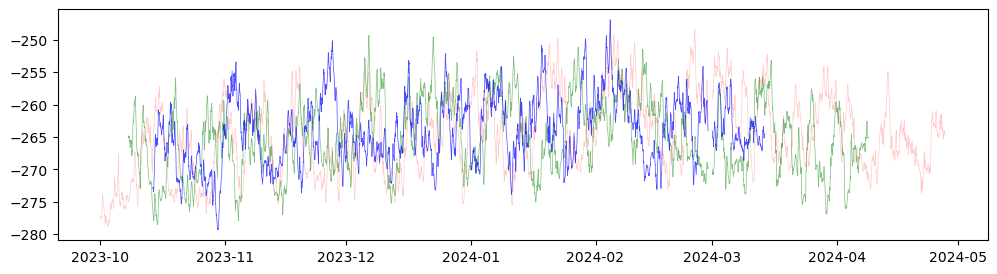

In [15]:
#aws_21_plot.index = aws_20_plot.index
#aws_22_plot.index = aws_20_plot.index

#aws_22_plot.plot()


# Crear el plot
fig = plt.figure(figsize=(12,3))

ax1 = fig.add_subplot(111)


ax1.plot(t2.index,t2['2020-2021']-273.15,color="red",linestyle="-",alpha=0.2,marker='.',lw=0.5,markersize=0)
ax1.plot(t2.index,t2['2021-2022']-273.15,color="green",linestyle="-",alpha=0.5,marker='.',lw=0.5,markersize=0)
ax1.plot(t2.index,t2['2022-2023']-273.15,color="blue",linestyle="-",alpha=0.7,marker='.',lw=0.5,markersize=0)

#fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/test.png', bbox_inches="tight",dpi=300) #TOKEN

plt.show()

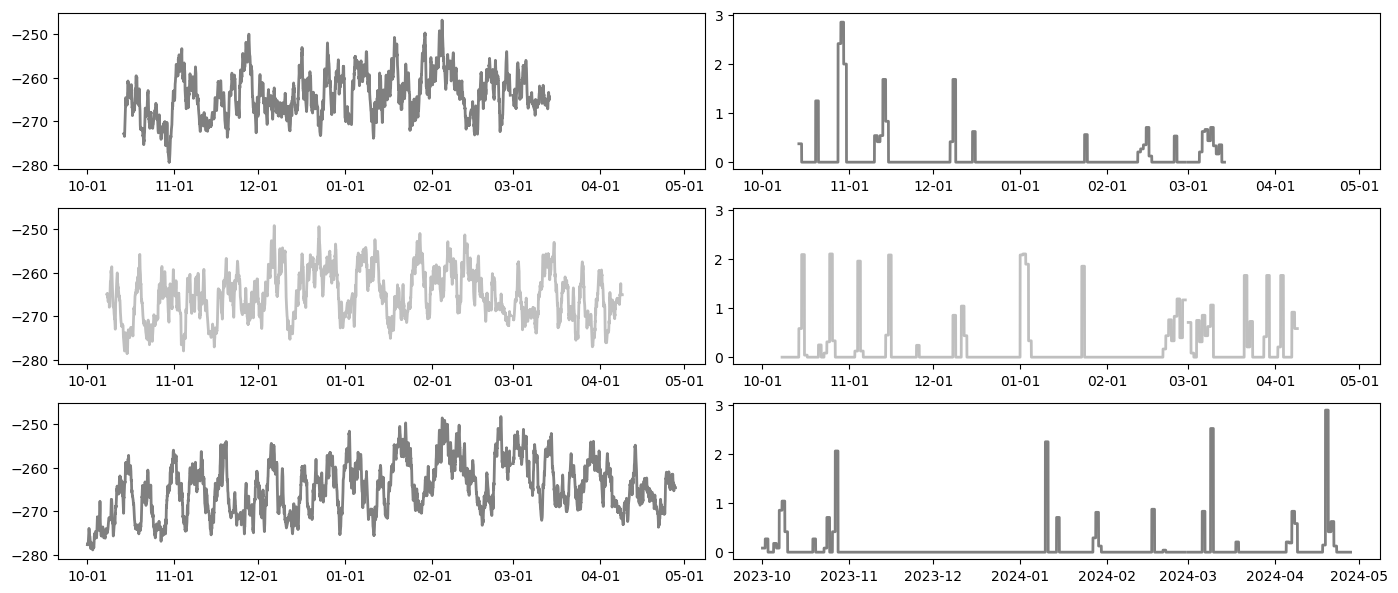

In [24]:
#aws_21_plot.index = aws_20_plot.index
#aws_22_plot.index = aws_20_plot.index

#aws_22_plot.plot()

# ax1.plot(t2.index,t2['2020-2021']-273.15,color="gray",linestyle="-",alpha=0.2,marker='.',lw=2,markersize=0)
# ax1.plot(t2.index,t2['2021-2022']-273.15,color="gray",linestyle="-",alpha=0.5,marker='.',lw=2,markersize=0)
# ax1.plot(t2.index,t2['2022-2023']-273.15,color="gray",linestyle="-",alpha=0.7,marker='.',lw=2,markersize=0)

# Crear el plot
fig = plt.figure(figsize=(14,6))
#Temperature
ax1 = fig.add_subplot(321)
ax1.plot(t2.index,t2['2020-2021']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax1.plot(t2.index,t2['2021-2022']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax1.plot(t2.index,t2['2022-2023']-273.15,color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax2 = fig.add_subplot(323)
ax2.plot(t2.index,t2['2021-2022']-273.15,color="gray",linestyle="-",alpha=0.5,marker='.',lw=2,markersize=0)
ax2.plot(t2.index,t2['2020-2021']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax2.plot(t2.index,t2['2022-2023']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax3 = fig.add_subplot(325)
ax3.plot(t2.index,t2['2022-2023']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax3.plot(t2.index,t2['2021-2022']-273.15,color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax3.plot(t2.index,t2['2020-2021']-273.15,color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)


plt.tight_layout()
#ax1.plot(aws_22_plot.index,aws_21_plot['T2'],color="red",linestyle="-",alpha=1,marker='.',lw=1,markersize=0)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

#Temperature
ax4 = fig.add_subplot(322)
ax4.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax4.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax4.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax5 = fig.add_subplot(324)
ax5.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0.5,marker='.',lw=2,markersize=0)
ax5.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax5.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax5 = fig.add_subplot(326)
ax5.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax5.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax5.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)


#ax1.set_facecolor("lightgray")
#plt.grid(ls="--",color="white",alpha=0.5,axis='y')


#ax1.set_xticklabels(aws_22_plot.index)

fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/test.png', bbox_inches="tight",dpi=300) #TOKEN

plt.show()

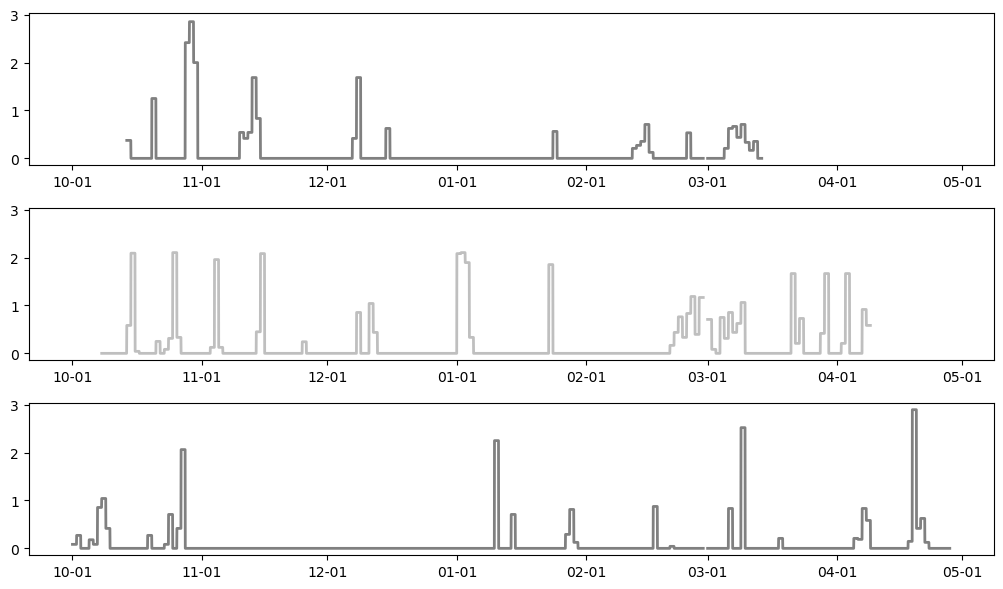

In [19]:
#aws_21_plot.index = aws_20_plot.index
#aws_22_plot.index = aws_20_plot.index

#aws_22_plot.plot()

# ax1.plot(t2.index,t2['2020-2021']-273.15,color="gray",linestyle="-",alpha=0.2,marker='.',lw=2,markersize=0)
# ax1.plot(t2.index,t2['2021-2022']-273.15,color="gray",linestyle="-",alpha=0.5,marker='.',lw=2,markersize=0)
# ax1.plot(t2.index,t2['2022-2023']-273.15,color="gray",linestyle="-",alpha=0.7,marker='.',lw=2,markersize=0)

# Crear el plot
fig = plt.figure(figsize=(20,6))
#Temperature
ax1 = fig.add_subplot(321)
ax1.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax1.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax1.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax2 = fig.add_subplot(323)
ax2.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0.5,marker='.',lw=2,markersize=0)
ax2.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax2.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax3 = fig.add_subplot(325)
ax3.plot(t2.index,pp['2022-2023'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax3.plot(t2.index,pp['2021-2022'],color="gray",linestyle="-",alpha=0,marker='.',lw=2,markersize=0)
ax3.plot(t2.index,pp['2020-2021'],color="gray",linestyle="-",alpha=1,marker='.',lw=2,markersize=0)


plt.tight_layout()
#ax1.plot(aws_22_plot.index,aws_21_plot['T2'],color="red",linestyle="-",alpha=1,marker='.',lw=1,markersize=0)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))




#ax1.set_facecolor("lightgray")
#plt.grid(ls="--",color="white",alpha=0.5,axis='y')


#ax1.set_xticklabels(aws_22_plot.index)

plt.show()

In [34]:
plt.plot()

,2020-2021,2021-2022,2022-2023
0,268.664333,NaN,NaN
1,268.854167,NaN,NaN
2,268.713500,NaN,NaN
3,268.709333,NaN,NaN
4,269.010667,NaN,NaN
...,...,...,...
5084,NaN,NaN,NaN
5085,NaN,NaN,NaN
5086,NaN,NaN,NaN
5087,NaN,NaN,NaN


In [5]:
len(aws_20_plot),len(aws_21_plot)

(5089, 5089)

In [16]:
aws_22_mod = aws_22.copy()
aws_22_mod.index = aws_22_mod.index.strftime('%m-%d %H:%M')

new_index = pd.date_range(start='2023-10-01', end='2024-04-30', freq='H').strftime('%m-%d %H:%M')

aws_22_mod = aws_22_mod.reindex(new_index)

<AxesSubplot: >

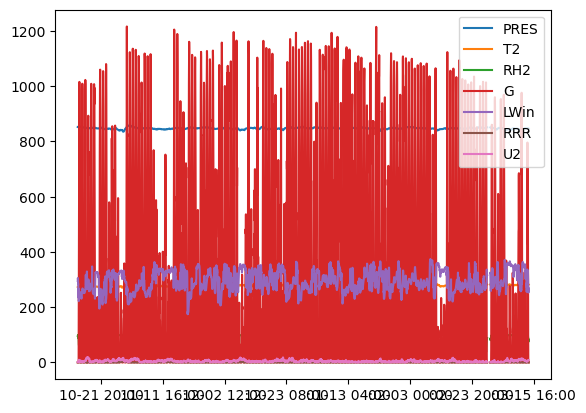

In [18]:
aws_22_mod.plot()

In [15]:
aws_22

,PRES,T2,RH2,G,LWin,RRR,U2
TIMESTAMP,,,,,,,
2022-10-14 00:00:00,852.331433,273.466500,96.183333,0.00000,294.993650,0.375,1.696833
2022-10-14 01:00:00,852.305300,273.421000,98.416667,0.00000,305.729367,0.375,0.772500
2022-10-14 02:00:00,852.136250,273.431333,98.800000,0.00000,299.983483,0.375,1.672000
2022-10-14 03:00:00,851.675767,273.471833,97.116667,0.00000,283.247350,0.375,1.581000
2022-10-14 04:00:00,851.637467,273.101833,98.750000,0.00000,284.692700,0.375,2.910833
...,...,...,...,...,...,...,...
2023-03-13 19:00:00,847.419100,281.583333,87.733333,99.38840,296.501650,0.000,7.317333
2023-03-13 20:00:00,847.411483,281.111500,80.658333,8.35694,257.076800,0.000,7.017667
2023-03-13 21:00:00,847.502917,281.221167,75.633333,0.00000,253.040683,0.000,7.048500
